케라스 데이터셋 로이터 데이터의 일반적 딥러닝테스트 학습시키지 않은 테스트 데이터 hidden layer의 수 4, 8,16,32,64 : 46개 클래스에 적용하기 위하여32개정도

In [12]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

len(train_data), len(test_data)

#train_data[5]

(8982, 2246)

In [13]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[5]])
print(decoded_newswire)

? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


In [14]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
	results=np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence]=1.
	return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
	results=np.zeros((len(labels), dimension))
	for i, label in enumerate(labels):
		results[i, label] =1.
	return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [27]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 40ms/step - loss: 3.5955 - accuracy: 0.0495 - val_loss: 3.3777 - val_accuracy: 0.0490
Epoch 2/20
18/18 [==============================] - 1s 28ms/step - loss: 3.1526 - accuracy: 0.1190 - val_loss: 2.9950 - val_accuracy: 0.3362
Epoch 3/20
18/18 [==============================] - 1s 29ms/step - loss: 2.7320 - accuracy: 0.3744 - val_loss: 2.6220 - val_accuracy: 0.3940
Epoch 4/20
18/18 [==============================] - 0s 27ms/step - loss: 2.3337 - accuracy: 0.4050 - val_loss: 2.2906 - val_accuracy: 0.4154
Epoch 5/20
18/18 [==============================] - 1s 29ms/step - loss: 1.9786 - accuracy: 0.5501 - val_loss: 2.0001 - val_accuracy: 0.5632
Epoch 6/20
18/18 [==============================] - 0s 28ms/step - loss: 1.6568 - accuracy: 0.5981 - val_loss: 1.7674 - val_accuracy: 0.5766
Epoch 7/20
18/18 [==============================] - 1s 29ms/step - loss: 1.4556 - accuracy: 0.5991 - val_loss: 1.6701 - val_accuracy: 0.5726
Epoch 8/20
18

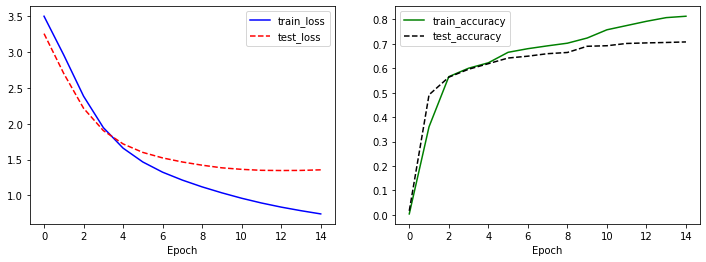

In [26]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [28]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 38ms/step - loss: 3.5337 - accuracy: 0.1659 - val_loss: 3.1658 - val_accuracy: 0.3540
Epoch 2/20
18/18 [==============================] - 0s 27ms/step - loss: 2.7944 - accuracy: 0.5225 - val_loss: 2.4394 - val_accuracy: 0.6042
Epoch 3/20
18/18 [==============================] - 1s 28ms/step - loss: 2.0224 - accuracy: 0.6746 - val_loss: 1.8371 - val_accuracy: 0.6598
Epoch 4/20
18/18 [==============================] - 0s 27ms/step - loss: 1.5007 - accuracy: 0.6990 - val_loss: 1.5340 - val_accuracy: 0.6808
Epoch 5/20
18/18 [==============================] - 1s 28ms/step - loss: 1.2244 - accuracy: 0.7247 - val_loss: 1.3871 - val_accuracy: 0.6897
Epoch 6/20
18/18 [==============================] - 1s 30ms/step - loss: 1.0560 - accuracy: 0.7475 - val_loss: 1.3068 - val_accuracy: 0.7057
Epoch 7/20
18/18 [==============================] - 0s 27ms/step - loss: 0.9296 - accuracy: 0.7808 - val_loss: 1.2537 - val_accuracy: 0.7159
Epoch 8/20
18

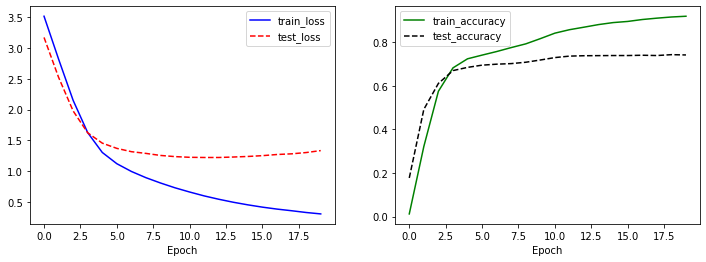

In [18]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [19]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 38ms/step - loss: 3.4849 - accuracy: 0.2874 - val_loss: 2.9666 - val_accuracy: 0.5111
Epoch 2/20
18/18 [==============================] - 1s 32ms/step - loss: 2.4270 - accuracy: 0.5753 - val_loss: 2.0098 - val_accuracy: 0.6118
Epoch 3/20
18/18 [==============================] - 1s 29ms/step - loss: 1.6265 - accuracy: 0.6693 - val_loss: 1.5499 - val_accuracy: 0.6696
Epoch 4/20
18/18 [==============================] - 1s 31ms/step - loss: 1.2196 - accuracy: 0.7399 - val_loss: 1.3323 - val_accuracy: 0.7106
Epoch 5/20
18/18 [==============================] - 1s 30ms/step - loss: 0.9804 - accuracy: 0.7918 - val_loss: 1.2149 - val_accuracy: 0.7360
Epoch 6/20
18/18 [==============================] - 0s 28ms/step - loss: 0.8130 - accuracy: 0.8275 - val_loss: 1.1425 - val_accuracy: 0.7516
Epoch 7/20
18/18 [==============================] - 0s 26ms/step - loss: 0.6816 - accuracy: 0.8543 - val_loss: 1.0896 - val_accuracy: 0.7622
Epoch 8/20
18

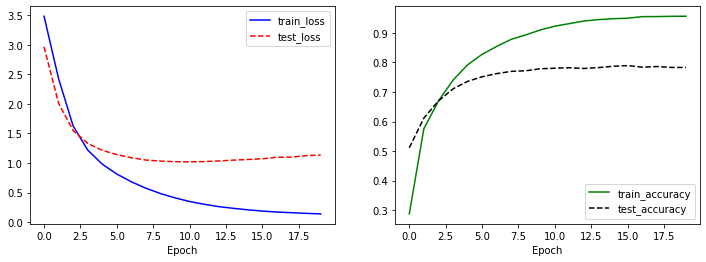

In [20]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [21]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 39ms/step - loss: 3.5328 - accuracy: 0.2307 - val_loss: 3.0923 - val_accuracy: 0.4194
Epoch 2/20
18/18 [==============================] - 0s 26ms/step - loss: 2.4765 - accuracy: 0.6037 - val_loss: 1.9686 - val_accuracy: 0.6425
Epoch 3/20
18/18 [==============================] - 0s 26ms/step - loss: 1.4963 - accuracy: 0.6992 - val_loss: 1.4094 - val_accuracy: 0.6919
Epoch 4/20
18/18 [==============================] - 0s 28ms/step - loss: 1.0782 - accuracy: 0.7686 - val_loss: 1.2175 - val_accuracy: 0.7231
Epoch 5/20
18/18 [==============================] - 0s 26ms/step - loss: 0.8515 - accuracy: 0.8202 - val_loss: 1.0998 - val_accuracy: 0.7596
Epoch 6/20
18/18 [==============================] - 0s 27ms/step - loss: 0.6741 - accuracy: 0.8608 - val_loss: 1.0213 - val_accuracy: 0.7707
Epoch 7/20
18/18 [==============================] - 0s 26ms/step - loss: 0.5321 - accuracy: 0.8933 - val_loss: 0.9702 - val_accuracy: 0.7823
Epoch 8/20
18

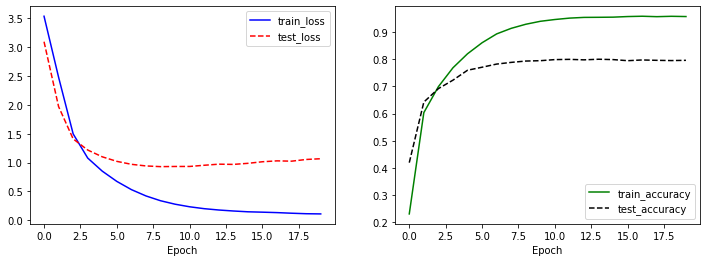

In [22]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [29]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 43ms/step - loss: 3.2430 - accuracy: 0.4644 - val_loss: 2.4820 - val_accuracy: 0.5641
Epoch 2/20
18/18 [==============================] - 1s 28ms/step - loss: 1.9284 - accuracy: 0.6274 - val_loss: 1.6333 - val_accuracy: 0.6625
Epoch 3/20
18/18 [==============================] - 1s 29ms/step - loss: 1.3337 - accuracy: 0.7100 - val_loss: 1.3456 - val_accuracy: 0.6986
Epoch 4/20
18/18 [==============================] - 0s 27ms/step - loss: 1.0435 - accuracy: 0.7735 - val_loss: 1.1921 - val_accuracy: 0.7346
Epoch 5/20
18/18 [==============================] - 1s 29ms/step - loss: 0.8258 - accuracy: 0.8211 - val_loss: 1.0908 - val_accuracy: 0.7609
Epoch 6/20
18/18 [==============================] - 1s 28ms/step - loss: 0.6488 - accuracy: 0.8597 - val_loss: 1.0146 - val_accuracy: 0.7756
Epoch 7/20
18/18 [==============================] - 1s 28ms/step - loss: 0.5050 - accuracy: 0.8951 - val_loss: 0.9730 - val_accuracy: 0.7876
Epoch 8/20
18

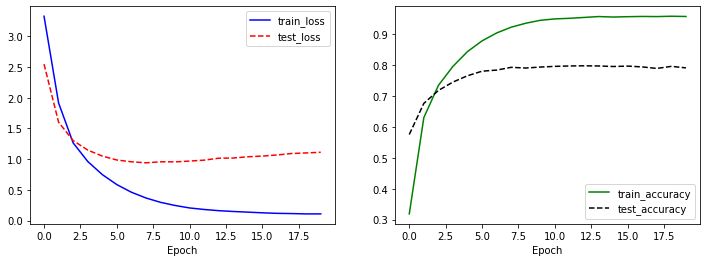

In [24]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()